## Лабораторная работа №2. Методы классификации данных.

#### Выполнила:
Козменкова Е.П.  
#### Группа: 
18-ИВТ-3  
#### Вариант:
№27  
#### Набор данных:
6 (occupancy)
#### Классификаторы:  
2 - классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);  
4 - логический классификатор (бинарное решающее дерево).  

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. date - дата и время замера
2. Temperature - температура в градусах Цельсия 
3. Humidity - влажность воздуха, %
4. Light - освещенность офиса, Люкс
5. CO2 - уровень углекислого газа CO2, ppm (пропромилле)
6. Humidity Ratio - удельная влажность, производное количество от температуры и относительной влажности, в кг водяного пара/кг воздуха
7. Occupancy - заполненность, 0 или 1: 0 для незанятого, 1 для занятого состояния

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [8]:
occupancy_DF = pd.read_csv("datatraining.txt")
occupancy_DF

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [10]:
init_len= len(occupancy_DF)
occupancy_DF.drop_duplicates(keep= False,inplace=True)
finit_len = len(occupancy_DF)
print("Удалено дубликатов: " , init_len - finit_len)

Удалено дубликатов:  0


In [11]:
occupancy_DF

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

In [19]:
import seaborn as sns

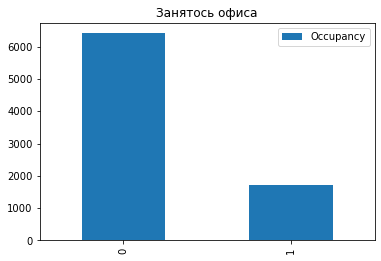

In [21]:
occupancy_DF['Occupancy'].value_counts().plot(kind='bar', label='Occupancy')
plt.legend()
plt.title("Занятось офиса");

Как видно из гистограммы, классы несбалансированны, преобладает первый класс (0).

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

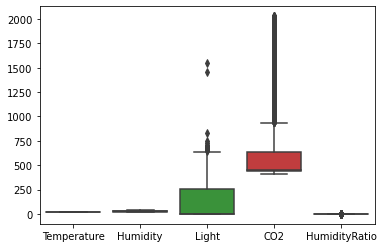

In [23]:
before_scaling = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]
sns.boxplot(data = occupancy_DF[before_scaling])

#### Нормализация

In [38]:
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

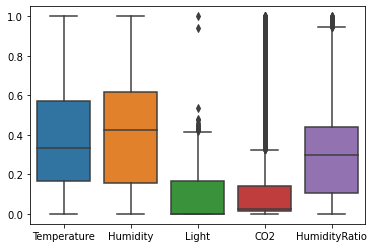

In [39]:
occupancy_DF[before_scaling] = MinMaxScaler().fit_transform(occupancy_DF[before_scaling])
sns.boxplot(data = occupancy_DF[before_scaling])

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [48]:
categorical = [c for c in occupancy_DF.columns if occupancy_DF[c].dtype.name == 'object']
print("Категориальные признаки: ", categorical)

Категориальные признаки:  ['date']


In [49]:
occupancy_DF[categorical].describe()

,date
count,8143
unique,8143
top,2015-02-10 00:11:59
freq,1


In [42]:
occupancy_DF['date'].unique()

array(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
       '2015-02-04 17:53:00', ..., '2015-02-10 09:30:59',
       '2015-02-10 09:32:00', '2015-02-10 09:33:00'], dtype=object)

#### Все значения уникальны (указано в сопровождающем документе, измерения проводились каждую минуту), замена не имеет смысла

### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации).

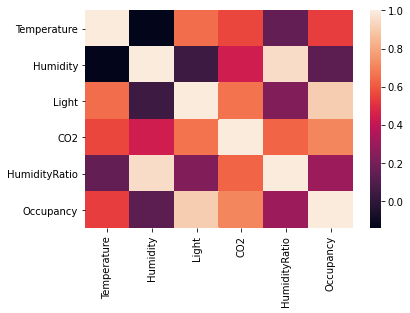

In [104]:
corr_matrix = occupancy_DF.corr()
sns.heatmap(corr_matrix)

#### Признаки коррелируют равномерно

### 7.	Заполните пропущенные значения в данных.

In [46]:
occupancy_DF.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

#### Пропущенных значений нет

### 8.	Решите поставленную задачу классификации в соответствии с заданием. 
#### При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

#### 1) Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов):

In [66]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X = occupancy_DF.drop(('date'), axis=1)
Y = occupancy_DF.Occupancy
X.columns 

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [62]:
radius_classif = RadiusNeighborsClassifier()
radius_classif.get_params()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}
radius_classif_grid = GridSearchCV(radius_classif, params)
radius_classif_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
#r = radius_classif_grid.best_estimator_.radius_neighbors
radius_classif = RadiusNeighborsClassifier(4)
radius_classif.fit(x_train, y_train)

rad_classif_predict = radius_classif.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, rad_classif_predict ))
print('Best: ',  radius_classif_grid.best_score_)

Accuracy:  0.7838722881702824
Best:  0.9708771929824561


#### 2) Логический классификатор (бинарное решающее дерево):

In [152]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

parametrs = {'max_depth': list(range(1, 7)), 'max_features': list(range(1, 7))}
decision_tree_grid = GridSearchCV(decision_tree, parametrs)
decision_tree_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                 

In [143]:
best_features = decision_tree_grid.best_estimator_.max_features
best_depth = decision_tree_grid.best_estimator_.max_depth
best_score = decision_tree_grid.best_score_
print('best train score:', best_score, 
      'features number:', best_features,
      'depth:', best_depth)

decision_tree = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
decision_tree.fit(x_train, y_train)
best_score  = np.mean(y_test == decision_tree.predict(x_test))
print('test score: ', best_score)

best train score: 1.0 features number: 6 depth: 1
test score:  1.0


### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

In [144]:
proba_radius_classif = radius_classif.predict_proba(x_test)
proba_decision_tree = decision_tree.predict_proba(x_test)

inversion = [1-y for y in y_test]

##### PR-графики

In [145]:
def PRPlot(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

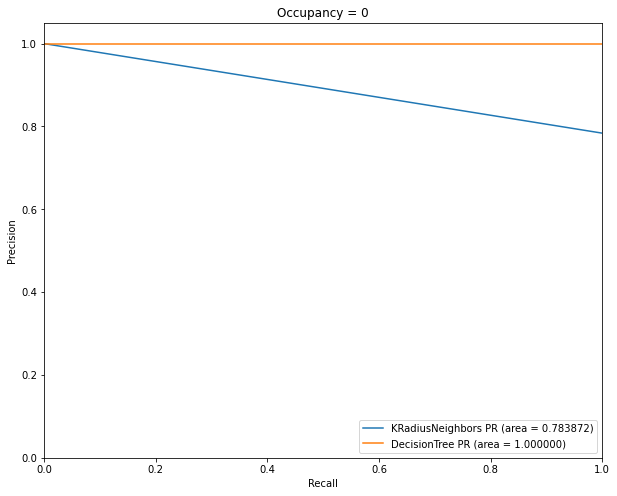

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
plt.figure(figsize=(10,8))

PRPlot(proba_radius_classif, 0, 'KRadiusNeighbors',inversion)
PRPlot(proba_decision_tree, 0, 'DecisionTree', inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

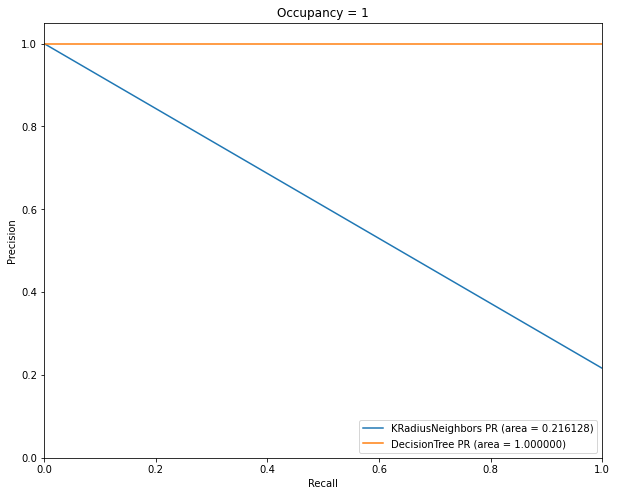

In [147]:
plt.figure(figsize=(10,8))

PRPlot(proba_radius_classif, 1, 'KRadiusNeighbors', y_test)
PRPlot(proba_decision_tree, 1, 'DecisionTree', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

##### ROC - графики

In [148]:
def ROCPlot0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def ROCPlot1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

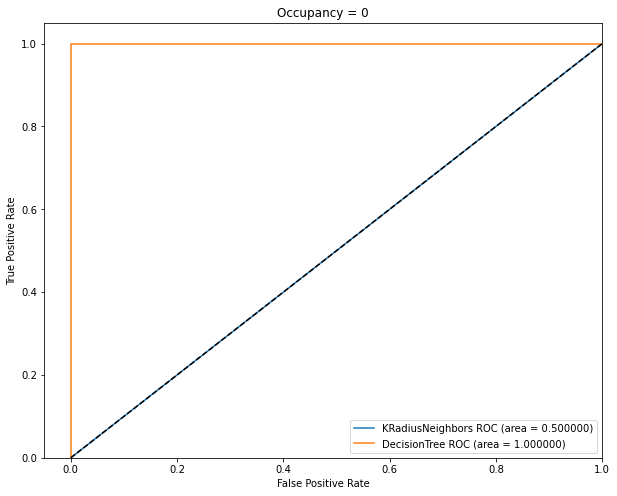

In [151]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,8))

ROCPlot0(proba_radius_classif, 'KRadiusNeighbors', y_test)
ROCPlot0(proba_decision_tree, 'DecisionTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

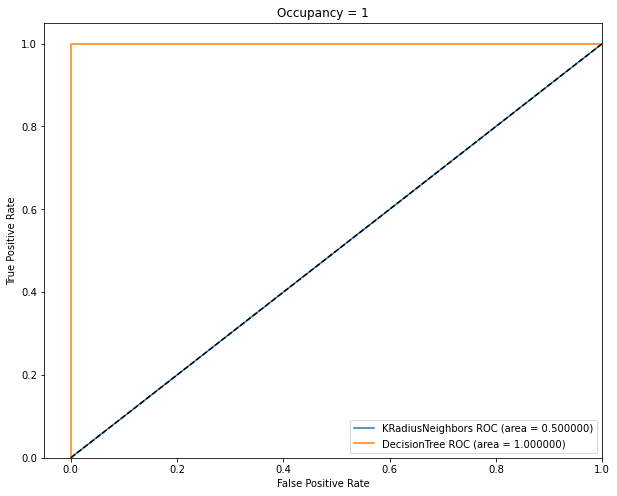

In [150]:
plt.figure(figsize=(10,8))

ROCPlot1(proba_radius_classif, 'KRadiusNeighbors', y_test)
ROCPlot1(proba_decision_tree, 'DecisionTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()